# Solutions to Exercises in Predictive Modeling

### Exercise: Linear regression with a single predictor variable

### Part a)

In [ ]:
hist(faithful$eruptions)
hist(faithful$waiting)

### Part b)

In [ ]:
with(faithful, plot(eruptions, waiting))

### Part c)
It appears that there are two types of eruptions, those of shorter
  duration and those of longer duration. Eruptions of short duration are followed
  by short waiting times until the next eruption. Eruptions of long duration
  are followed by long waiting times.

### Part d)

In [ ]:
fm <- lm(waiting ~ eruptions, data=faithful)
summary(fm)

  Part i) The intercept $\beta_0 = 33.47$ represents the average
  waiting time (until the next eruption) just after observing an
  eruption of zero minutes in duration. So, it's not really all that
  meaningful.

  Part ii) The coefficient on duration $\beta_1 = 10.7$ represents
  the average effect on waiting time for a one--minute increase in
  duration. In other words, for every minute of duration of an eruption,
  you will have to wait an additional 10.7 minutes until the next eruption
  (or long eruptions are followed by long waiting times).

  Part iii) The predicted waiting time is
  
  $ \beta_0 + \beta_14 = 33.47 + 10.73 \times 4 = 76.4~\text{minutes} $ 
  
  Regarding the uncertainty in the
  prediction, you can either 1) look at the scatter plot right around
  the duration value of 4 minutes and see that the range is about 25
  minutes, or 2) look at the residual standard error from the summary
  of the fitted model. It shows that $\sigma = 5.9$. We know that the
  observations should be within about 3 standard errors of the mean,
  the range would be $\pm 5.9\times 3 = \pm16.8$, or a range of about 32. So a prediction between about 20 and 35 minutes is reasonable. The idea of this exercise is that
  a prediction represents a point estimate and that there is
  uncertainty in that estimate.


### Exercise: Using multiple linear regression to summarize a dataset

In [ ]:
fm <- lm(mpg ~ cyl + hp + wt, data = mtcars)
summary(fm)

### Part a)
$\beta_3 \approx -3.17$ means that for every 1000 lb increase in weight of the car, its miles per gallon decreases by approximately 3.17.

### Part b)
You would want to decrease the weight, number of cylinders and horsepower. All three have negative coefficients in the model,  so as they increase, miles per gallon decreases.

### Part c)

In [ ]:
beta0 <- coef(fm)[1] # intercept
beta1 <- coef(fm)[2] # cyl
beta2 <- coef(fm)[3] # hp
beta3 <- coef(fm)[4] # wt

avg_cyl <- mean(mtcars$cyl)
avg_hp <- mean(mtcars$hp)


plot(mpg ~ wt, data=mtcars)
abline(beta0 + beta1*avg_cyl + beta2*avg_hp, beta3)

### Part d)

In [ ]:
mtcars$pred <- fitted(fm)
plot(mpg ~ pred, data=mtcars, xlab="Predicted mpg", ylab="Actual mpg")

### Part e)

\begin{align*}
     \hat{\sigma}_{\epsilon} &= \sqrt{ \frac{\sum_{i=1}^n \left(y_i - \hat{y_i}\right)^2}{n-k}} \\
     \hat{\sigma}_{\epsilon}&= \sqrt{ \frac{176.56}{32-4}} \\
     \hat{\sigma}_{\epsilon}&= 2.511 
     \end{align*}




### Part f) 
Yes, the $R^2$ value of 0.8431 and the residual standard error of 2.512 indicate that the linear model does an effective job at representing the data.

### Exercise: Linear regression with numeric and categorical predictors.

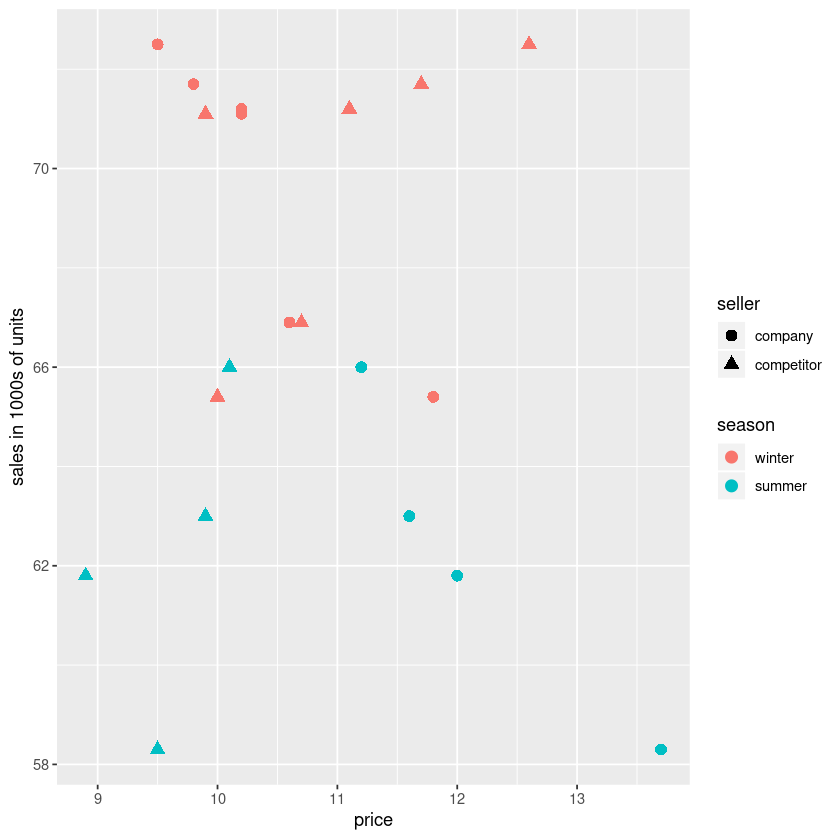

In [2]:
Sales <- read.csv("../data/sales.csv")
Sales$season <- factor(Sales$season, levels=c(0,1),
                   labels=c("winter","summer"))

## put the data in long format for ggplot2
price <- with(Sales, c(company.price, competitor.price))
sales <- with(Sales, rep(sales, 2))
seller <- factor(rep(c("company","competitor"), each=10))
season <- with(Sales, rep(season, 2))
Sales2 <- data.frame(price=price, sales=sales, seller=seller, season=season)

ggplot(Sales2) +
    geom_point(aes(x=price, y=sales, shape=seller, color=season), size=3) +
    labs(y="sales in 1000s of units")

In [ ]:
fm <- lm(sales ~ company.price + competitor.price + season, data=Sales)
summary(fm)
coef(fm)


$\beta_0$ is the average company sales at a company price of zero dollars
and a competitor price of zero dollars for the winter season.

$\beta_1$ is the effect on sales of a one dollar increase in the company
price, holding competitor price and season constant. So, for every one dollar
increase in company price, sales decrease by about 2,927 units.

$\beta_2$ is the effect on sales of a one dollar increase in competitor
price. For each one dollar increase in competitor price, sales increase
by about 208 units, holding company price and season constant.

$\beta_3$ is the effect on sales of going from the winter season
to the summer season, holding prices constant. On average, the company
sells about 2039 less units during summer.
\end{itemize}

Competitor price should not be included in the model because
the $p$-value is large, meaning that competitor price has little or no
effect on company sales.

If both companies charge \$11 during the winter season, expected sales are

$\beta_0 + \beta_111 + \beta_211 \approx 68$

or about 68,000 units.